## Influência do investimento federal no ensino superior sobre a nota geral do ENADE (Exame Nacional de Desempenho dos Estudantes)

Neste trabalho, analisamos se os investimentos em educação realizados pelo governo federal tem forte influência sobre o resultado geral na nota do ENADE.
Essa análise foi feita entre os anos de 2004 e 2017.

In [47]:
import pandas as pd
enade = pd.read_csv('nt_ger_describe_enade', encoding="ISO-8859-1", sep=' ', dtype={})

Os dados mostrados logo abaixo, foram extraidos da base de dados do ENADE,  que está  anexado nesse repositório: 

In [48]:
tabelaEnade = pd.DataFrame(enade, columns = ['ano', 'count', 'mean', 'min', 'max'])
tabelaEnade = tabelaEnade.loc[(tabelaEnade['mean'].notnull())]
tabelaEnade['mean'] = pd.to_numeric(tabelaEnade['mean'])
print(tabelaEnade)

     ano     count       mean  min        max
0   2004  155402.0  29.628143  0.0  88.500000
1   2005  306167.0  33.709877  0.0  93.699997
2   2006  462980.0  32.409144  0.0  91.900000
3   2007  215305.0  35.670821  0.0  93.699997
4   2008  461032.0  31.976922  0.0  95.099998
5   2009  760976.0  40.018042  0.0  97.700000
6   2010  346541.0  38.935507  0.0  90.900000
7   2011  302224.0  42.388671  0.0  93.200000
8   2012  469556.0  38.019321  0.0  94.000000
9   2013  168941.0  44.819209  0.0  92.400000
10  2014  396713.0  44.343968  0.0  97.400000
11  2015  448245.0  44.496038  0.0  95.500000
12  2016  195764.0  47.151318  0.0  93.200000
13  2017  449932.0  43.523969  0.0  98.100000


In [49]:
import pandas as pd
investimento = pd.read_csv('inv_educacao', sep=" ")

In [50]:
investimento = pd.DataFrame(investimento, columns=['ano','educacao_total','ensino_superior','proporcao','cr_total', 'cr_sup'])
investimento['cr_sup'] = pd.to_numeric(investimento['cr_sup'])
investimento['cr_total'] = pd.to_numeric(investimento['cr_total'])
investimento['proporcao'] = pd.to_numeric(investimento['proporcao'])

Resumo dos investimentos realizados pelo governo federal entre os anos de 2004 e 2017 na educação. Esses dados foram extraidos da base de dados LOA (Lei Orçamentária Anual).

In [51]:
print(investimento)

     ano  educacao_total  ensino_superior  proporcao  cr_total  cr_sup
0   2004    1.730314e+10     6.370188e+09      36.82     21.50    0.00
1   2005    2.102257e+10     8.857250e+09      42.13     21.50   39.04
2   2006    2.167108e+10     8.470484e+09      39.09      3.08   -4.37
3   2007    2.758015e+10     1.043064e+10      37.82     27.27   23.14
4   2008    3.171404e+10     1.117442e+10      35.23     14.99    7.13
5   2009    4.052463e+10     1.128744e+10      27.85     27.78    1.01
6   2010    5.090373e+10     1.543101e+10      30.31     25.61   36.71
7   2011    6.370715e+10     1.829785e+10      28.72     25.15   18.58
8   2012    7.428037e+10     2.125524e+10      28.61     16.60   16.16
9   2013    8.128680e+10     2.294577e+10      28.23      9.43    7.95
10  2014    9.449066e+10     2.712662e+10      28.71     16.24   18.22
11  2015    1.033633e+11     3.127001e+10      30.25      9.39   15.27
12  2016    9.978888e+10     3.084490e+10      30.91     -3.46   -1.36
13  20

In [52]:
for i in range(1, len(investimento['cr_sup'])):
    investimento['cr_sup'][i] = investimento['cr_sup'][i] + investimento['cr_sup'][i-1]

/home/vinicius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Taxa de investimento no ensino superior')

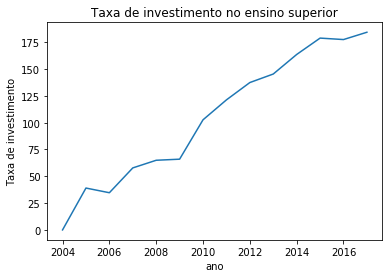

In [53]:
import matplotlib.pyplot as plt
A = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
plt.plot(A, investimento['cr_sup'])
plt.xlabel('ano')
plt.ylabel('Taxa de investimento')
plt.title('Taxa de investimento no ensino superior')

Text(0.5,1,'Nota média no ENADE')

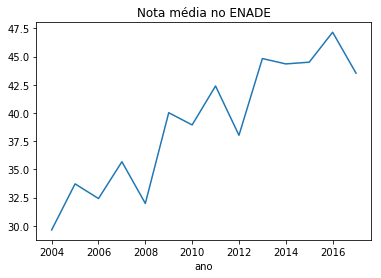

In [54]:
plt.plot(A, tabelaEnade['mean'])
plt.xlabel('ano')
plt.title('Nota média no ENADE')

<BarContainer object of 14 artists>

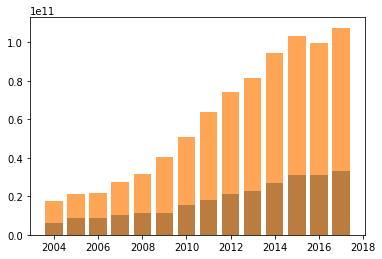

In [55]:
plt.bar(A, investimento['ensino_superior'])
plt.bar(A, investimento['educacao_total'], alpha=0.7)

<BarContainer object of 14 artists>

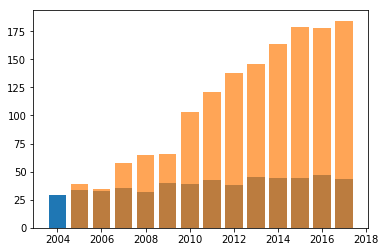

In [56]:
plt.bar(A, tabelaEnade['mean'])
plt.bar(A, investimento['cr_sup'], alpha=0.7)

É possível observar que tanto o investimento, quanto a médias das notas aumentaram ao longo dos anos. Portanto, entre todas as variáveis que influênciam a nota final do ENADE, é viavel induzir que o investimento na educação em geral influência o desempenho dos alunos do ensino superior.